In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_csv("dataset/train.csv")
test_dataset = pd.read_csv("dataset/test.csv")

In [2]:
"""
Libraries Required

"""
from keras.models import Sequential
from keras import callbacks,regularizers
from keras.layers import Dense, LSTM,Dropout, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
#from keras.preprocessing.sequence import pad_sequences
#from keras import backend as acc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA


Using TensorFlow backend.


In [3]:
"""
Splitting the data and labels
Shape of the dataset : [7352, 562]
"""
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
print("Dataset shape :",X.shape)

X_test = test_dataset.iloc[:,:-1]
y_test = test_dataset.iloc[:,-1]


Dataset shape : (7352, 562)


In [4]:
def NN_model():
    """
    Neural Network model
    
    Layers
    -------
    layer 1 : dense 64 units, relu activation
    layer 2 : dense 128 units, relu activation
    layer 3 : dense 64 units, relu activation
    layer 4 : dense 6 units, softmax activation
    
    Dropout Layer : droprate = 20% (after each dense layer)
    
    Returns
    -------
    model
    
    """
    model=Sequential()
    model.add(Dense(64,kernel_initializer='he_normal',activation='relu', input_dim=X_train.shape[1],kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(128,kernel_initializer='he_normal',activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(64,kernel_initializer='he_normal',activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(6,kernel_initializer='he_normal',activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

In [5]:
#X_train,X_dev,y_train,y_dev = train_test_split(X,y, test_size=0.2)
kf = KFold(n_splits=5)
#print(kf.get_n_splits(X))

sc=StandardScaler()
history,models,acc,pcs = [],[],[],[]
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
#print(y_etest,y_test)
labels = encoder.classes_
y_test=pd.get_dummies(y_test).values

for train_index, dev_index in kf.split(X):
    
    X_train, X_dev = X.iloc[train_index,:], X.iloc[dev_index,:]
    y_train, y_dev = y[train_index], y[dev_index]
    
    
    X_train=sc.fit_transform(X_train)
    X_dev=sc.transform(X_dev)
    
    encoder=LabelEncoder()
    y_train=encoder.fit_transform(y_train)
    y_train=pd.get_dummies(y_train).values

    
    encoder=LabelEncoder()
    y_dev=encoder.fit_transform(y_dev)
    y_dev=pd.get_dummies(y_dev).values
    
    #Principal Component Analysis
    pca=PCA(n_components=None)
    X_train=pca.fit_transform(X_train)
    X_dev=pca.transform(X_dev)
    pcs.append(pca)
    
    model = NN_model()
    models.append(model)
    callback = callbacks.EarlyStopping(monitor='loss',patience=3)
    history.append(model.fit(X_train,y_train,batch_size=128,epochs=20,callbacks = [callback], validation_data=(X_dev,y_dev)))
    acc.append(model.history.history['val_accuracy'][-1])
X_test = sc.transform(X_test)





Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                36032     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_______________________________________

5881/5881 [==============================] - 0s 29us/step - loss: 0.1739 - accuracy: 0.9957 - val_loss: 0.5224 - val_accuracy: 0.9143
Epoch 16/20
5881/5881 [==============================] - 0s 28us/step - loss: 0.1651 - accuracy: 0.9966 - val_loss: 0.4742 - val_accuracy: 0.9205
Epoch 17/20
5881/5881 [==============================] - 0s 28us/step - loss: 0.1643 - accuracy: 0.9963 - val_loss: 0.5159 - val_accuracy: 0.9150
Epoch 18/20
5881/5881 [==============================] - 0s 28us/step - loss: 0.1527 - accuracy: 0.9969 - val_loss: 0.4695 - val_accuracy: 0.9164
Epoch 19/20
5881/5881 [==============================] - 0s 27us/step - loss: 0.1472 - accuracy: 0.9988 - val_loss: 0.4528 - val_accuracy: 0.9171
Epoch 20/20
5881/5881 [==============================] - 0s 26us/step - loss: 0.1422 - accuracy: 0.9978 - val_loss: 0.4972 - val_accuracy: 0.9171
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape       

5882/5882 [==============================] - 0s 28us/step - loss: 0.1913 - accuracy: 0.9935 - val_loss: 0.2169 - val_accuracy: 0.9803
Epoch 14/20
5882/5882 [==============================] - 0s 27us/step - loss: 0.1773 - accuracy: 0.9956 - val_loss: 0.2111 - val_accuracy: 0.9816
Epoch 15/20
5882/5882 [==============================] - 0s 27us/step - loss: 0.1717 - accuracy: 0.9956 - val_loss: 0.2189 - val_accuracy: 0.9789
Epoch 16/20
5882/5882 [==============================] - 0s 28us/step - loss: 0.1626 - accuracy: 0.9963 - val_loss: 0.2077 - val_accuracy: 0.9850
Epoch 17/20
5882/5882 [==============================] - 0s 29us/step - loss: 0.1559 - accuracy: 0.9966 - val_loss: 0.2131 - val_accuracy: 0.9803
Epoch 18/20
5882/5882 [==============================] - 0s 28us/step - loss: 0.1581 - accuracy: 0.9954 - val_loss: 0.2169 - val_accuracy: 0.9782
Epoch 19/20
5882/5882 [==============================] - 0s 28us/step - loss: 0.1507 - accuracy: 0.9957 - val_loss: 0.1926 - val_accurac

Val_accuracy 		Accuracy
model_1 0.9211421012878418 	 0.9991498
model_2 0.9170632362365723 	 0.9977895
model_3 0.9149659872055054 	 0.99932
model_4 0.9829931855201721 	 0.9972798
model_5 0.976190447807312 	 0.99693984
Accuracy for the best model :  0.9619952494061758
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       537
           SITTING       0.97      0.86      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.98      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.98      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



<AxesSubplot:>

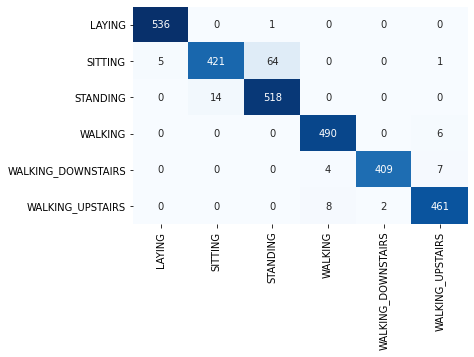

In [6]:
print("Val_accuracy","\t\tAccuracy")
for i,x in enumerate(models):
    print("model_"+str(i+1),x.history.history['val_accuracy'][-1],"\t",x.history.history['accuracy'][-1])
best_model = np.argmax(acc)
#X_test = scs[best_model].transform(X_test)
X_test=pcs[best_model].transform(X_test)
y_pred=models[best_model].predict(X_test)
y_test_label=np.argmax(y_test,axis=1)
y_pred_label=np.argmax(y_pred,axis=1)
from sklearn.metrics import confusion_matrix,accuracy_score
y_test_label = encoder.inverse_transform(y_test_label)
y_pred_label = encoder.inverse_transform(y_pred_label)
cm=confusion_matrix(y_test_label,y_pred_label)
accuracy=accuracy_score(y_test_label,y_pred_label)
report = classification_report(y_test_label,y_pred_label)
print("Accuracy for the best model : ",accuracy)
print(report)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm,ax=ax, annot=True,xticklabels=labels,yticklabels=labels,cmap='Blues',fmt='.3g',cbar=False)
